In [9]:
from easy_wordle.wordle import Wordle
import plotnine as p9
import pandas as pd
import json
from plotnine import ggplot, aes, geom_col, theme
# import seaborn as sns
from matplotlib import colors


ModuleNotFoundError: No module named 'plotnine'

In [147]:
colr = ['g', 'tab:blue', 'firebrick', 'xkcd:yellowish orange']

for color in colr:
    c_hex  = colors.to_hex(color) 
    print(c_hex)

#008000
#1f77b4
#b22222
#ffab0f


In [101]:
with open('data/word_freq.json') as f:
    word_frep = f.read() 
json.loads(word_frep)

{'a': 10.446817785527463,
 'b': 2.6852659110723627,
 'c': 3.681342632955536,
 'd': 3.356582388840453,
 'e': 8.979947689625108,
 'f': 1.4080209241499564,
 'g': 2.591543156059285,
 'h': 3.2824760244115083,
 'i': 6.649956408020924,
 'j': 0.503487358326068,
 'k': 2.214472537053182,
 'l': 5.481691368788143,
 'm': 3.262859633827376,
 'n': 5.446817785527463,
 'o': 6.268526591107236,
 'p': 2.964254577157803,
 'q': 0.2136006974716652,
 'r': 7.125108979947689,
 's': 5.682214472537053,
 't': 5.3356582388840454,
 'u': 4.7362685265911075,
 'v': 1.1399302528334785,
 'w': 1.5998256320836968,
 'x': 0.5056669572798606,
 'y': 3.825196163905841,
 'z': 0.6124673060156931}

In [102]:
wdl = Wordle()

In [103]:
no_dupe_letters= [word for word in wdl.possible_words if len(''.join(set(word)))==5  ]
s1 = {w: wdl.freq_score(w) for w in no_dupe_letters}
pd.Series(s1).sort_values(ascending=0).head()

serai    38.884045
raise    38.884045
arise    38.884045
aries    38.884045
ariel    38.683522
dtype: float64

In [104]:
unique_letters = {word:"".join(set(word)) for word in w.possible_words}
unique_letters_str = "".join(unique_letters.values())


In [105]:
letter_counts = {l:unique_letters_str.count(l) for l in "abcdefghijklmnopqrstuvwxyz"}

In [1]:
# wf = dict(zip(letter_counts_df.letter,letter_counts_df.perc))
# import json
# with open('data/word_freq.json', 'w') as outfile:
#     json.dump(wf, outfile)

In [108]:
with open('data/word_freq.json') as f:
    word_freq = json.loads(f.read())

In [109]:
letter_counts_df = pd.DataFrame({'letter':letter_counts.keys(),'count':letter_counts.values()})
letter_counts_df = letter_counts_df.assign(perc = lambda df: 100*(df['count']/sum(df['count']) ))
letter_counts_df.head()

,letter,count,perc
0,a,4793,10.446818
1,b,1232,2.685266
2,c,1689,3.681343
3,d,1540,3.356582
4,e,4120,8.979948


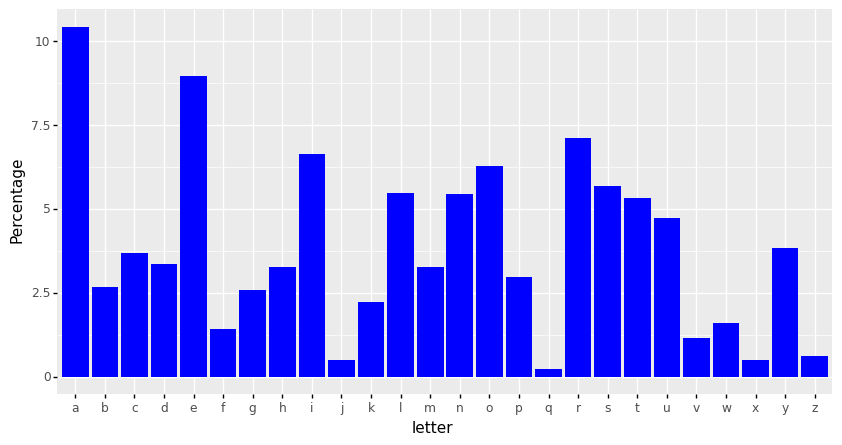

<ggplot: (310837438)>

In [137]:
(
    ggplot(letter_counts_df)+
    geom_col(aes('letter','perc',fill = 'letter'),show_legend  = False )+theme(figure_size=(10,5))+
    p9.labs(y = "Percentage")+p9.scale_fill_manual(values= ['blue']*26)
)


In [39]:
print(max([('h',3),('g',3)],key = lambda x:x[1] ) )

('h', 3)


In [23]:
## word letter overlap

In [25]:
len(no_dupe_letters)

6373

In [29]:
set('abc').intersection(set('bcd'))

{'b', 'c'}

In [37]:

def intersection_with_all_other_words(w):
    lst = [len(set(w).intersection(other_word)) for other_word in no_dupe_letters]
    return sum(lst)/len(lst)

intersection_with_all_other_words('abhore')


['abhor', 'abide', 'abies']


1.9179350384434333

In [38]:
intersection_dict= [(w,intersection_with_all_other_words(w)) for w in no_dupe_letters]

   index         n   Word
0  aries  1.938177  aries
1  serai  1.938177  serai
2  raise  1.938177  raise
3  arise  1.938177  arise
4  irena  1.929703  irena
5  reina  1.929703    NaN


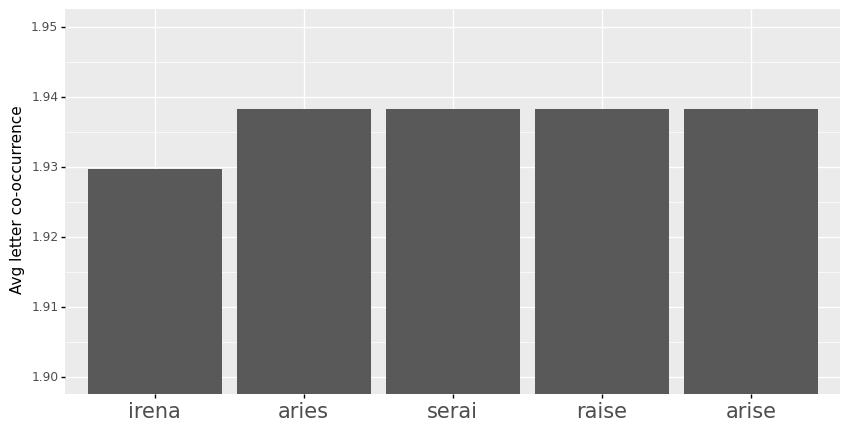

<ggplot: (308931518)>

In [98]:

plt_data = (
    pd.Series(dict(intersection_dict))
    .sort_values(ascending=0)
    .head(20)
    .to_frame()
    .reset_index()
    .rename(columns={0:'n'}).head(6)
    .assign(Word = lambda df: pd.Categorical(df['index'],
    categories=['irena','aries','serai' ,'raise'  ,'arise'   ]))
    )
print(plt_data)
(
    ggplot(plt_data.head(5))+
    geom_col(aes('Word','n'))+
    p9.labs(y = "Avg letter co-occurrence",x = None)+
    p9.coord_flip()+
    p9.coord_cartesian(ylim=(1.9,1.95))+
    p9.theme(figure_size=(10,5),axis_text_x=p9.element_text(size = 15))
    
    )

In [4]:
with open("/usr/share/dict/web2") as f:
    dict_raw = f.read()
dict = dict_raw.split("\n")


['A',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'Aani',
 'aardvark',
 'aardwolf',
 'Aaron',
 'Aaronic',
 'Aaronical',
 'Aaronite',
 'Aaronitic',
 'Aaru',
 'Ab',
 'aba',
 'Ababdeh',
 'Ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abacus',
 'Abadite',
 'abaff',
 'abaft',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abalone',
 'Abama',
 'abampere',
 'abandon',
 'abandonable',
 'abandoned',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abandonment',
 'Abanic',
 'Abantes',
 'abaptiston',
 'Abarambo',
 'Abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abase',
 'abased',
 'abasedly',
 'abasedness',
 'abasement',
 'abaser',
 'Abasgi',
 'abash',
 'abashed',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'Abassin',
 'abastardize',
 'abatable',
 'abate

In [14]:
set('ocean').intersection(set('once'))

{'c', 'e', 'n', 'o'}

In [27]:
# ocean
def find_word(letter_position_dict, letters):
    pass


class Wow:
    def __init__(self, letters):
        self.letters = letters

    def find_word(letter_position_dict):
        [word for word in dict if len(word) == 4 and word[1] == 'e' and len(
            set(word).intersection(set('tescn'))) == 4]


['cent', 'cest', 'nest', 'sect', 'sent']

In [20]:
  def _get_word_list():
       #with open("/usr/share/dict/words") as f:
        with open("data/wordle_words.txt") as f:
            word_list = [line.rstrip("\n") for line in f]

        word_list = list(set([word.lower() for word in word_list])) # turn all words lowercase and remove dupes
        # word_list = [word for word in word_list if len(word) == 5] # only look at 5 letter words
        word_list.sort() # sort alphabetically
        return word_list

In [21]:
word_list = _get_word_list()
len(word_list)



2315